# Solar cell pinhole chromaticity - run 2021-07-29

The goal of this notebook is to check the chromaticity of the 1mm and 5mm apertures.

In [1]:
import os, sys
print(os.path.dirname(os.getcwd()))
sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np
import matplotlib.pyplot as plt
import os
from astropy.io import fits

from astropy import constants as const
from astropy import units as u


from solarcell_dataset import SolarCellDataSet, SolarCellRun, calculate_npulses, get_info_from_filename, estimate_noise, get_solarcell_total_charge
%matplotlib notebook

/home/tsouverin/stardice/analysis/cbp_paper


Run at 1mm :

In [63]:
data_dir = "/data/STARDICE/cbp/solarcell/ut20210730/ShortDist_5mm_2"
other_str = "5mm"
nbursts = 5

run = SolarCellRun(directory_path=data_dir, tag=other_str, nbursts=nbursts)
run.load()
run.load_from_file(os.path.join(data_dir, f"QSWMax_EMPTY_ShortDist_5mm_2_ntuple.npy"))

100%|██████████| 140/140 [00:04<00:00, 28.01it/s]


<IPython.core.display.Javascript object>


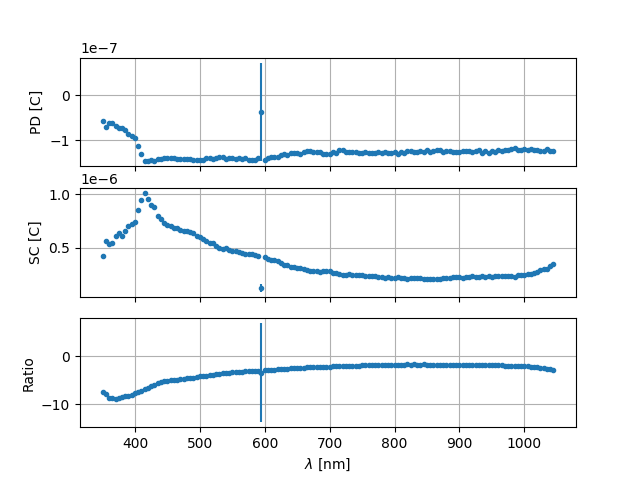

In [64]:
run.plot_summary()

<IPython.core.display.Javascript object>


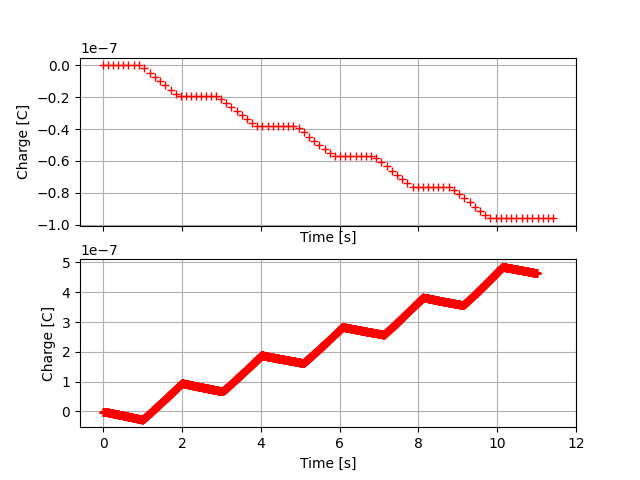

<IPython.core.display.Javascript object>


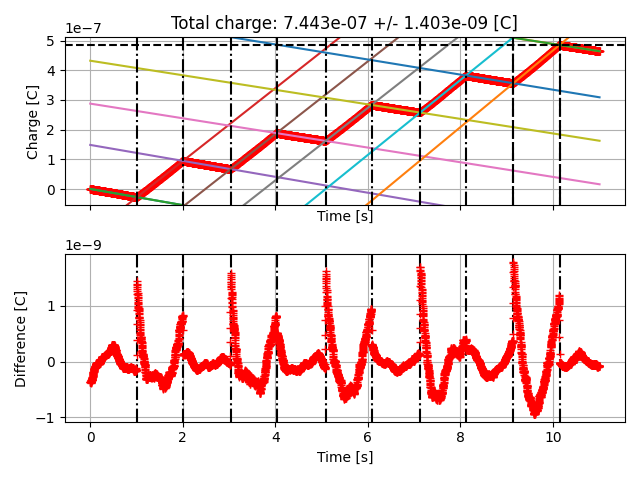

<IPython.core.display.Javascript object>


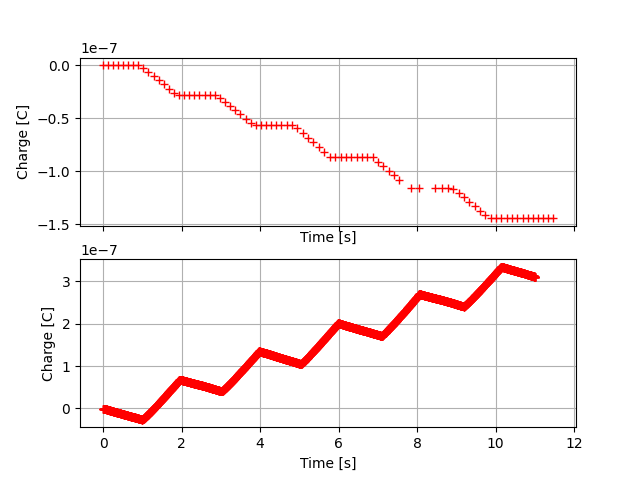

<IPython.core.display.Javascript object>


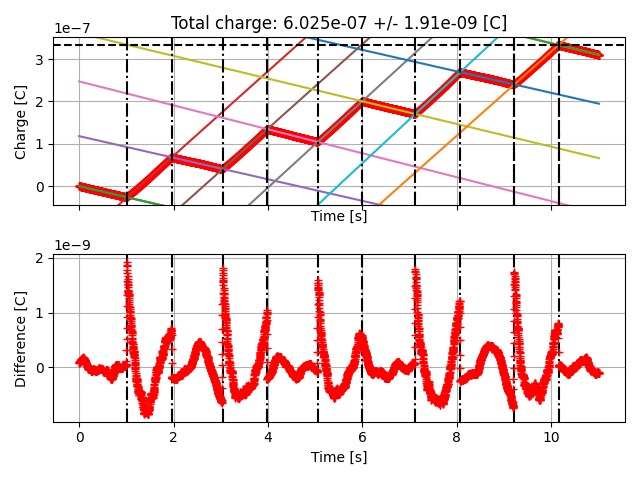

<IPython.core.display.Javascript object>


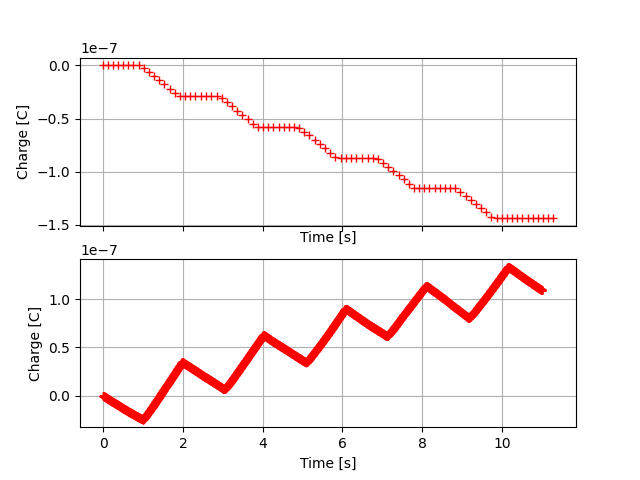

<IPython.core.display.Javascript object>


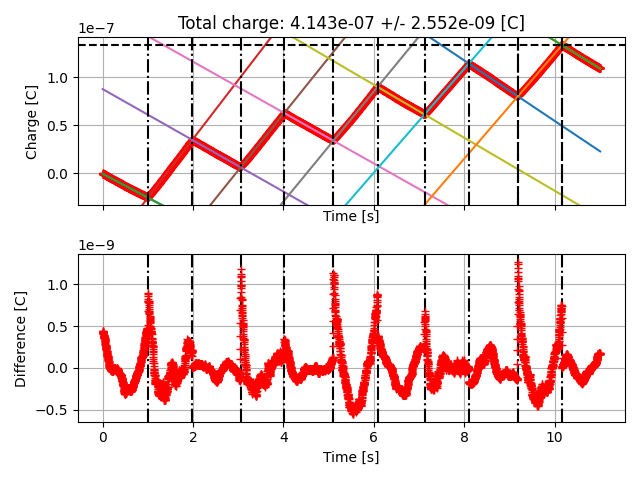

<IPython.core.display.Javascript object>


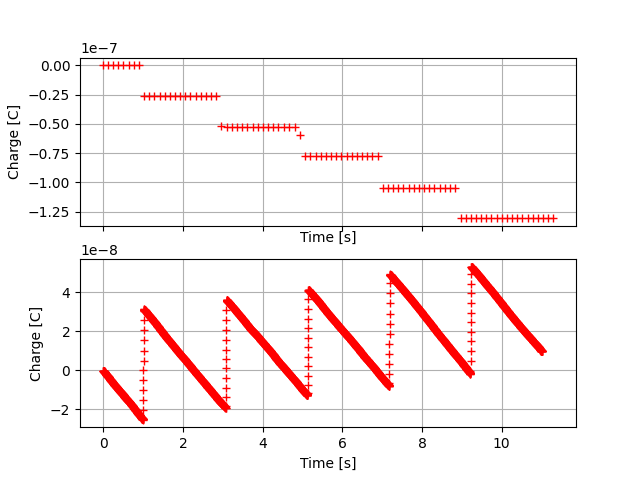

<IPython.core.display.Javascript object>


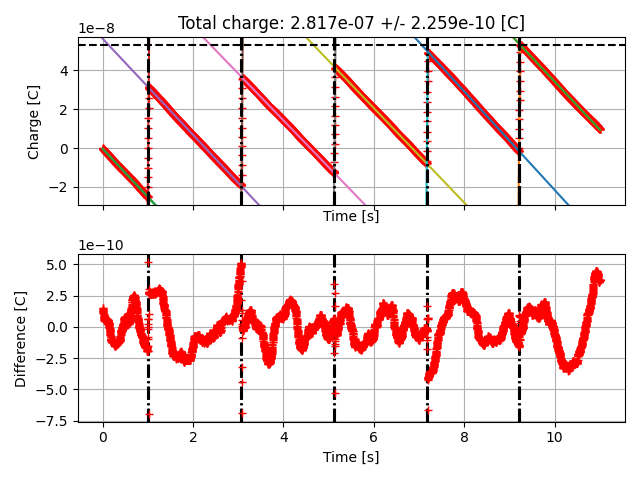

<IPython.core.display.Javascript object>


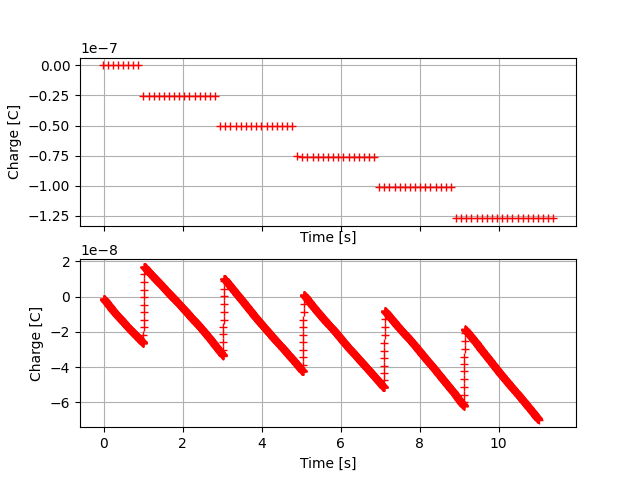

<IPython.core.display.Javascript object>


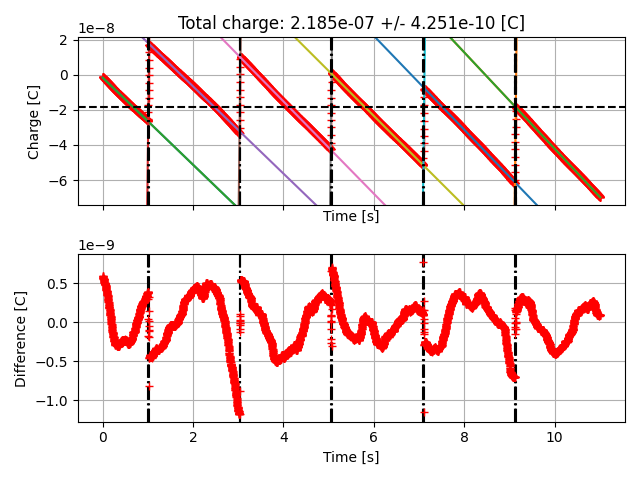

<IPython.core.display.Javascript object>


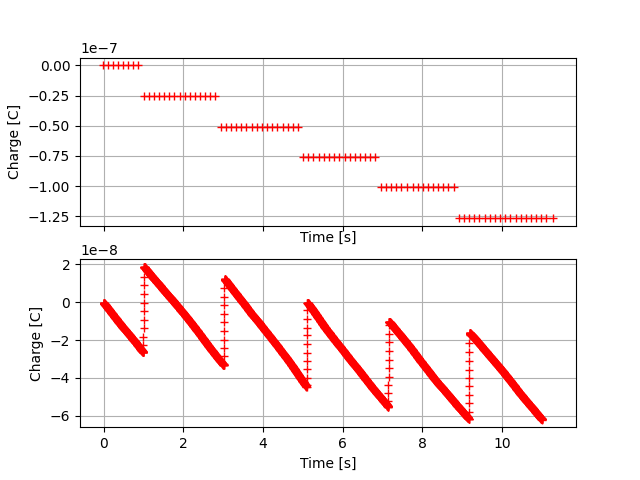

<IPython.core.display.Javascript object>


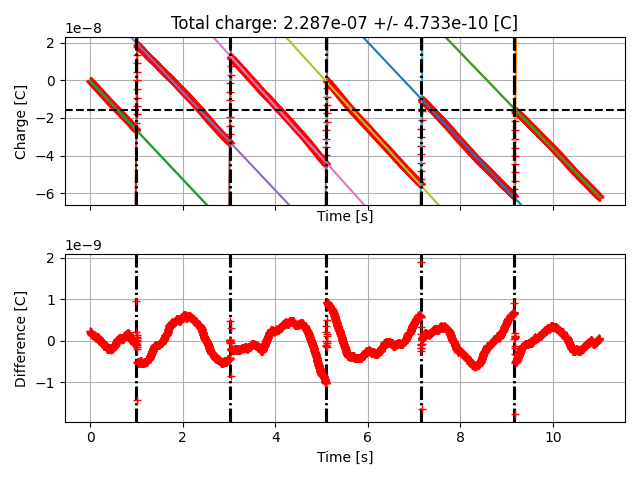

In [65]:
for wl in np.arange(400,1000,100):
    d = run.get_data_set(wl, 5)
    d.plot_data_set()
    noise = estimate_noise(d.sc.data["time"], d.sc.data["charge"])
    err = noise * np.ones_like(d.sc.data["time"])
    charge_sc, charge_sc_err, i_k1, i_k2, pvals_sc, indices_sc = get_solarcell_total_charge(
        d.sc.data["time"], d.sc.data["charge"], d.get_time_breaks(), err=err, plot=True)


Run at 5mm : 

100%|██████████| 140/140 [00:05<00:00, 27.71it/s]


<IPython.core.display.Javascript object>


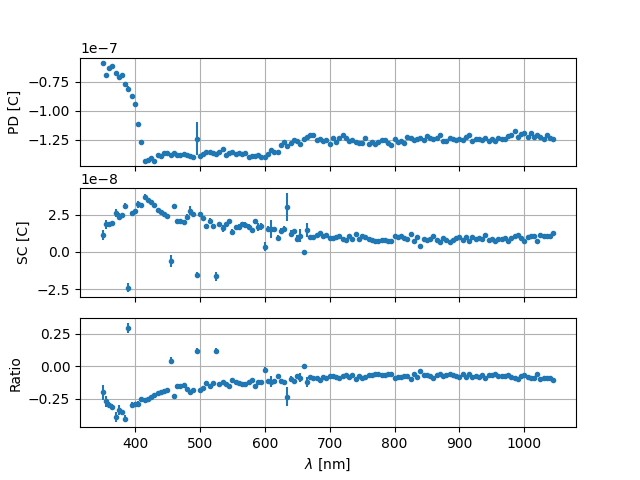

In [78]:
data_dir = "/data/STARDICE/cbp/solarcell/ut20210730/ShortDist_1mm_2"
other_str = "1mm"

run1 = SolarCellRun(directory_path=data_dir, nbursts=nbursts)
run1.load()
run1.load_from_file(os.path.join(data_dir, f"QSWMax_EMPTY_ShortDist_1mm_2_ntuple.npy"))
run1.plot_summary()

### CBP transmissions with 1mm and 5mm pinholes

In [50]:
ref_data_root = "/data/STARDICE/cbp/solarcell/refCalData/"
SC_QE_data_file = ref_data_root + 'SC_QE_from_mono_SC_ED_20210618_MultiDay.txt'
PD_QE_data_file = ref_data_root + 'SM05PD1B_QE.csv'

SC_QE = np.loadtxt(SC_QE_data_file, skiprows=1, delimiter=",").T
PD_QE = np.loadtxt(PD_QE_data_file, skiprows=1, delimiter=",").T

# PD_QE is in A/W units, convert it to e-/photons as SC_QE
PD_QE[1] *= (const.h * const.c / (PD_QE[0] * 1e-9 * u.meter * const.e.value)).value


<IPython.core.display.Javascript object>


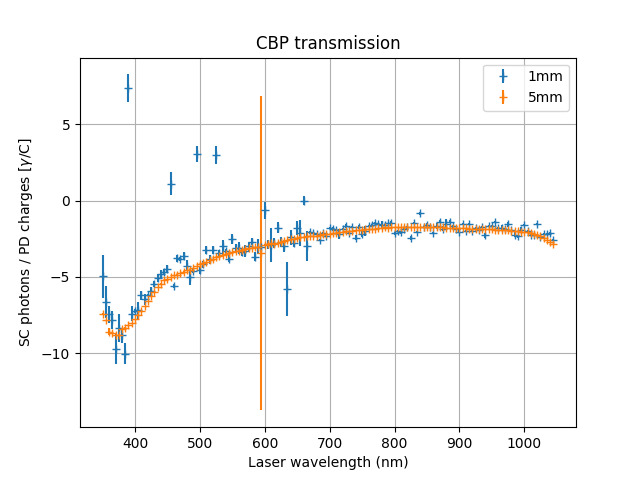

In [82]:
tr = run.data['sc_charge_total']/run.data["pd_charge_total"]
tr_err = tr * run.data["pd_charge_total_err"]/run.data["pd_charge_total"]
tr_err = tr * np.sqrt((run.data["sc_charge_total_err"]/run.data["sc_charge_total"])**2 + (run.data["pd_charge_total_err"]/run.data["pd_charge_total"])**2)


tr_1 = run1.data['sc_charge_total']/run1.data["pd_charge_total"]
tr_1_err = tr_1 * np.sqrt((run1.data["sc_charge_total_err"]/run1.data["sc_charge_total"])**2 + (run1.data["pd_charge_total_err"]/run1.data["pd_charge_total"])**2)
#tr_long_err = tr_long * run1.data["pd_charge_total_err"]/run1.data["pd_charge_total"]

fig = plt.figure()
plt.errorbar(run1.data["set_wl"], tr_1*25, yerr=25*tr_1_err, marker='+', linestyle="none", label="1mm")
plt.errorbar(run.data["set_wl"], tr, yerr=tr_err, marker='+', linestyle="none", label="5mm")

plt.xlabel('Laser wavelength (nm)')
plt.ylabel('SC photons / PD charges [$\gamma$/C]')
plt.grid()
plt.title("CBP transmission")
#plt.ylim(-0.1e-7, -0.3e-6)
plt.legend()
plt.show()



<IPython.core.display.Javascript object>


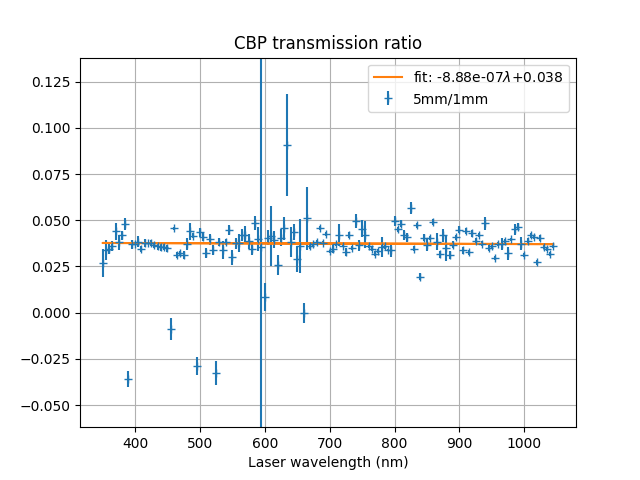

In [85]:
ratio = tr_1/tr
ratio_err = ratio * np.sqrt( (tr_err/tr)**2 + (tr_1_err/tr_1)**2)
pval = np.polyfit(run1.data["set_wl"], ratio, deg=1, w=1/ratio_err)

fig = plt.figure()
plt.errorbar(run1.data["set_wl"], ratio, yerr = ratio_err, linestyle="none", marker="+", label="5mm/1mm")
plt.plot(run1.data["set_wl"], np.polyval(pval, run1.data["set_wl"]), label=f"fit: {pval[0]:.3g}$\lambda$+{pval[1]:.3f}")
plt.title("CBP transmission ratio")
plt.grid()
plt.xlabel('Laser wavelength (nm)')
plt.legend()
plt.ylim(pval[1]-0.1, pval[1]+0.1)
plt.show()

## Checks

In [22]:
d = run.get_data_set(800, 5)
d_long = run_long.get_data_set(800, 5)

<IPython.core.display.Javascript object>


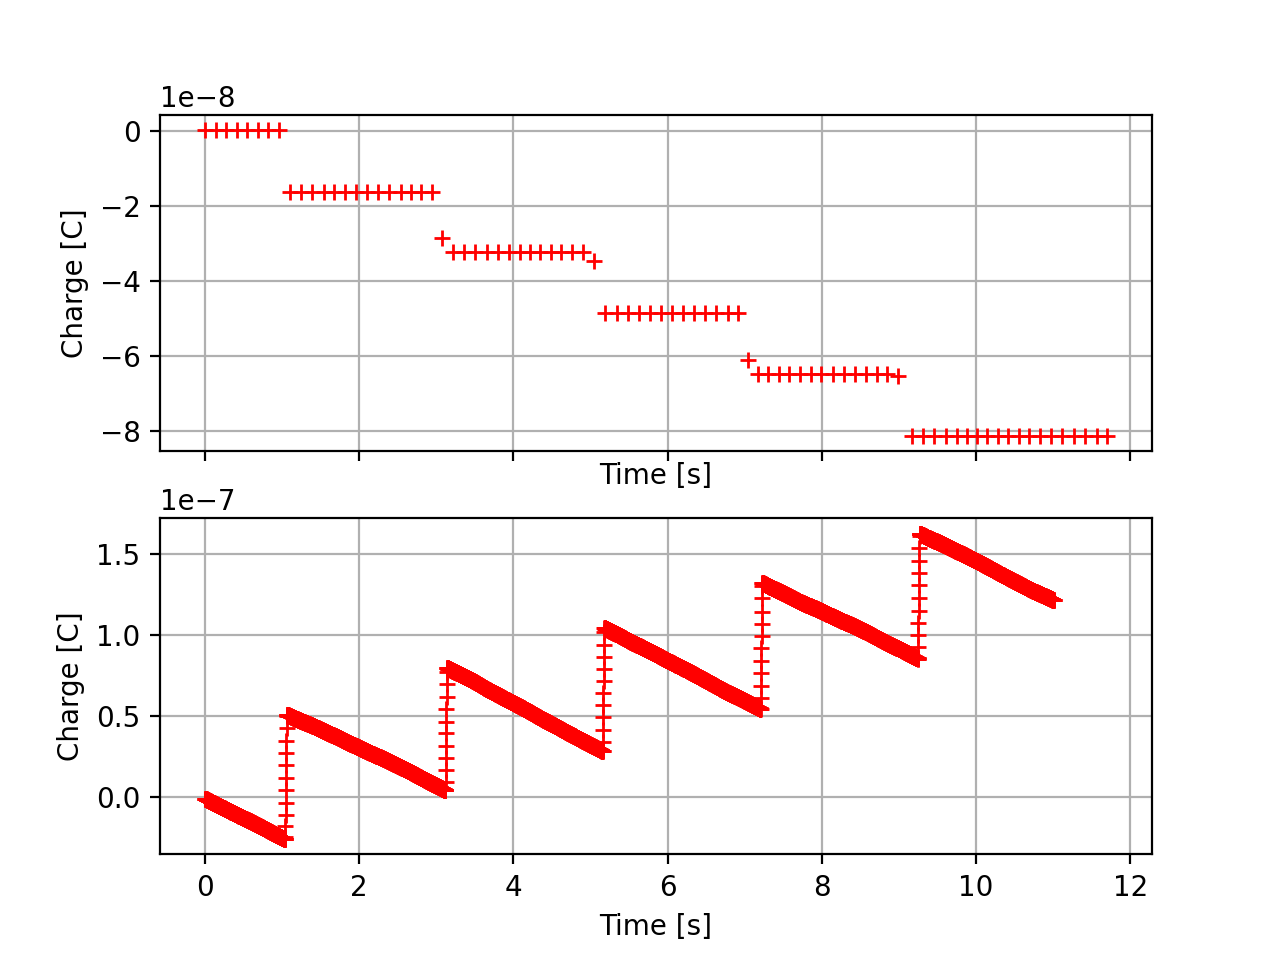

In [23]:
d.plot_data_set()

<IPython.core.display.Javascript object>


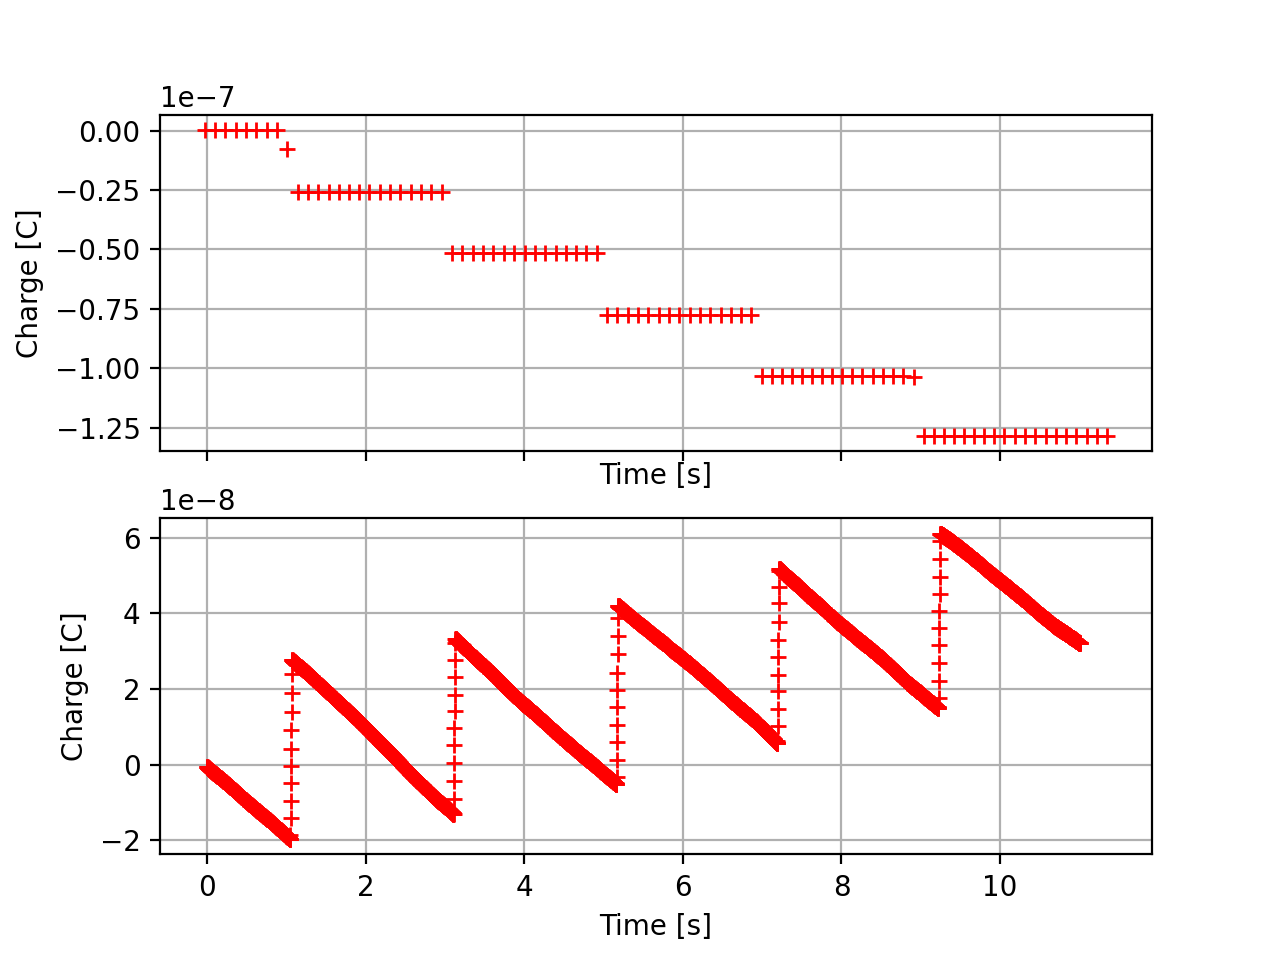

In [25]:
d_long.plot_data_set()